In [1]:
# importing packages and modules
import numpy as np
import jax.numpy as jnp
#import autograd.numpy as jnp
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize, check_grad
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm1
from scipy.stats import multivariate_normal, norm
from jax import value_and_grad
#from autograd import value_and_grad

sns.set_context("talk")

In [39]:
# setting hyperparameters
S = 100 # sessions
T = 10000 # trials per session
N = T * S # total data points
C = 2 # classes
K = 2 # states
D = 2 # features (sensory & bias)

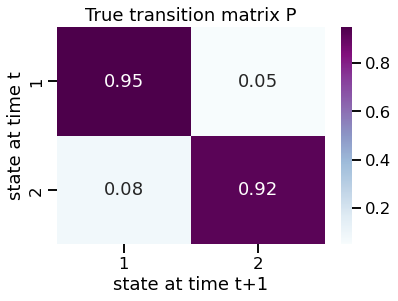

In [40]:
# True Transition Matrix
# trueP = jnp.zeros((2,2))
# trueP = trueP.at[0,0].set(0.97)
# trueP = trueP.at[0,1].set(0.03)
# trueP = trueP.at[1,0].set(.05)
# trueP = trueP.at[1,1].set(.95)
trueP = np.zeros((2,2))
trueP[0,0]=0.95
trueP[0,1]=0.05
trueP[1,0]=.08
trueP[1,1]=.92
plot_transition_matrix(trueP, title='True')

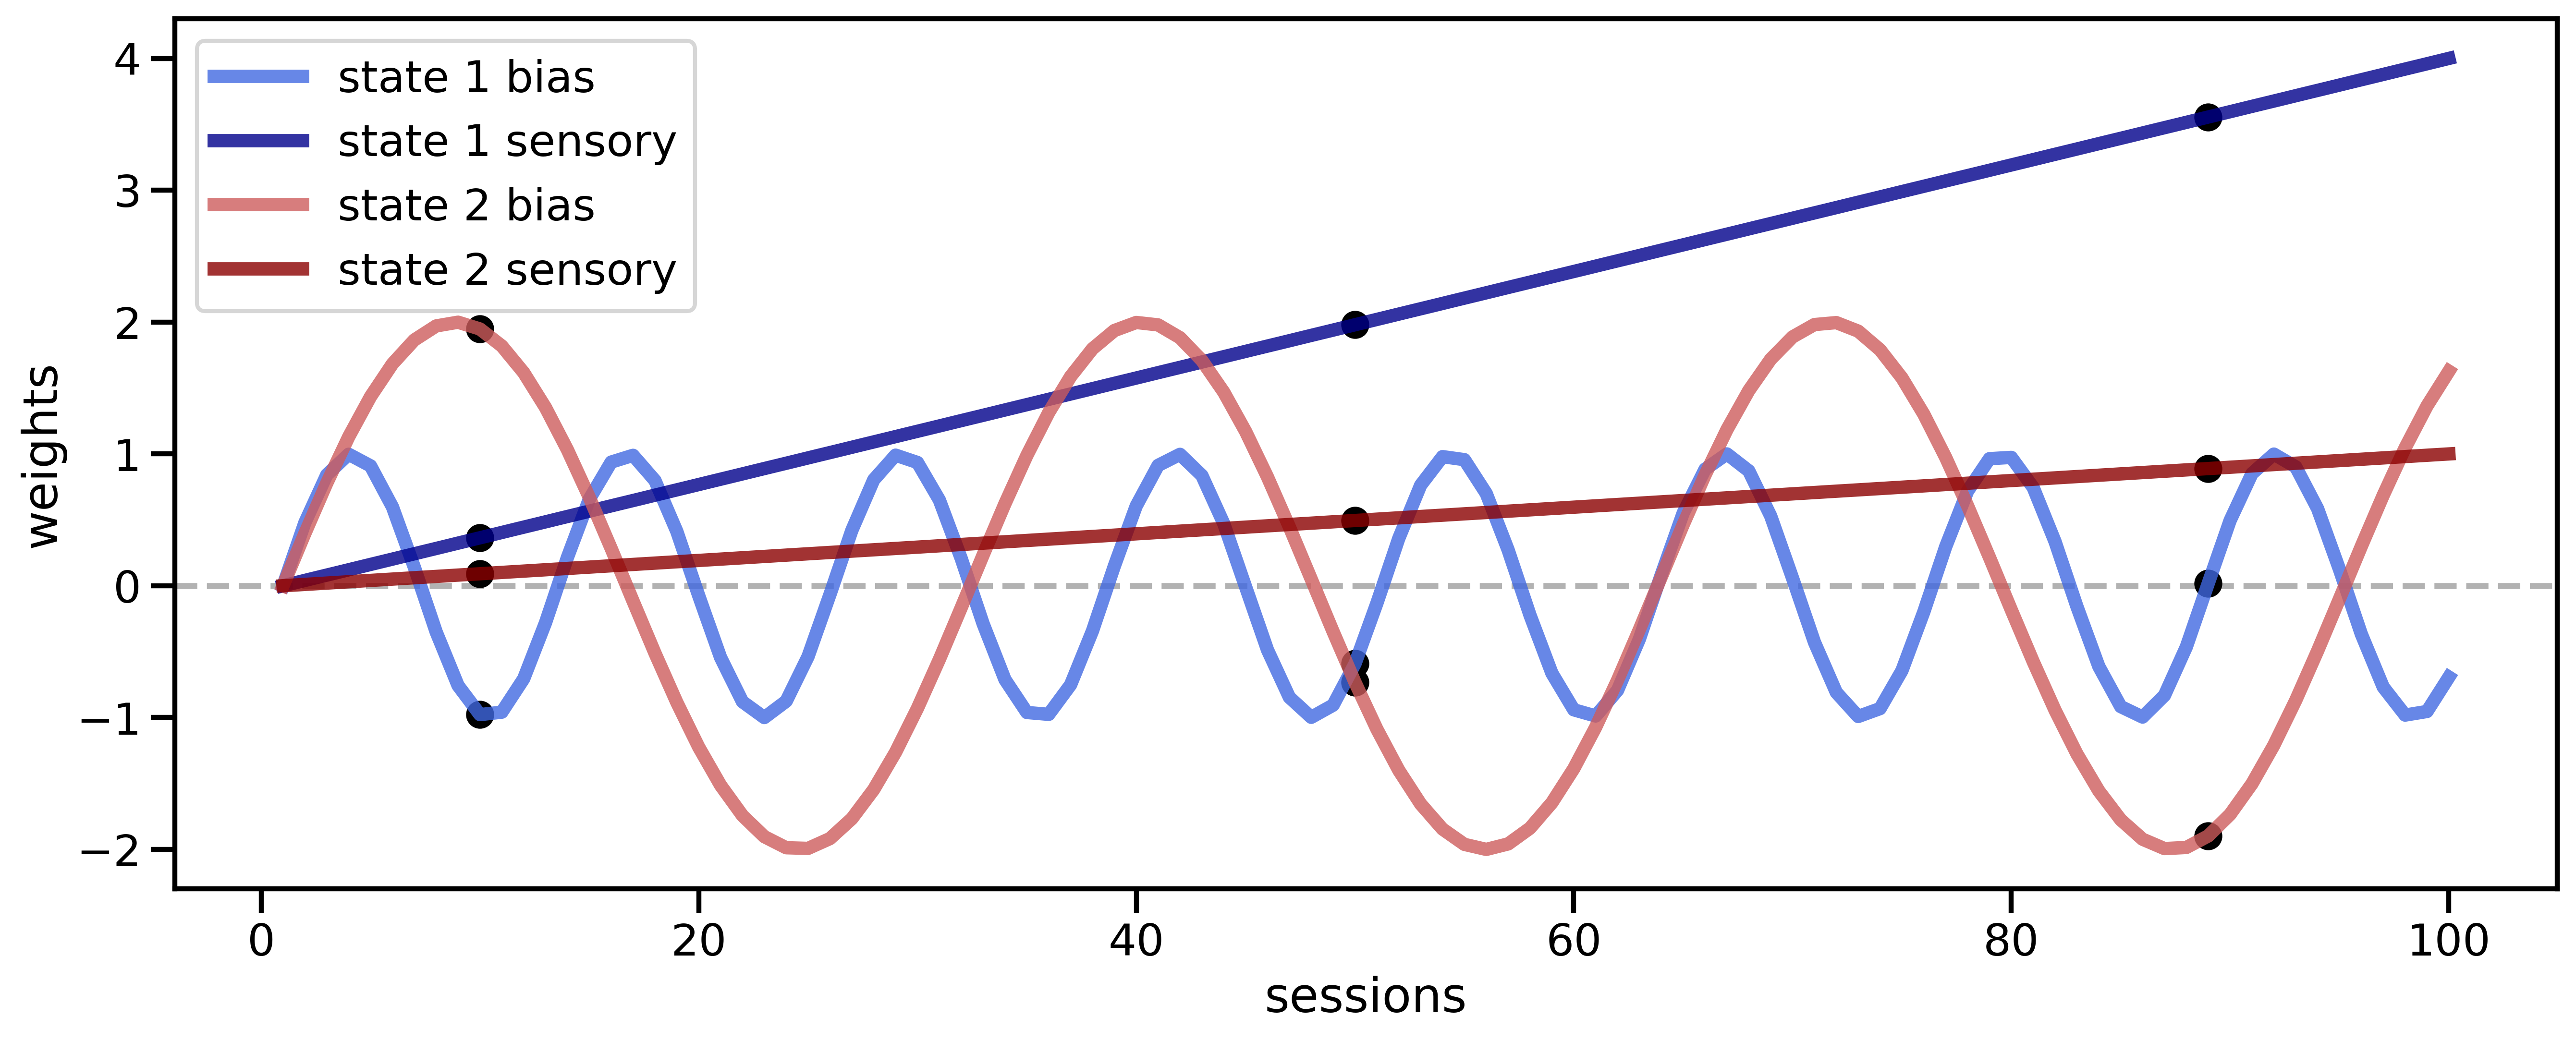

In [117]:
# True Weights and Session Start Indices
ourW = np.zeros((S,K,D))
ourW[:,0,1] = np.linspace(0,4,S) # state 1 sensory (increasing)
ourW[:,0,0] = np.sin(np.array(range(S))/2) # state 1 bias (decreasing)
ourW[:,1,1] = np.linspace(0,1,S) # state 2 sensory 
ourW[:,1,0] = 2 * np.sin(np.array(range(S))/5)  # state 2 bias (flat 1)
trueW = np.zeros((N,K,D,C))
# change weight format to have session*trials points
sessInd = []
for sess in range(0,S):
    sessInd.append(sess*T)
    for t in range(0,T):
        trueW[sess*T+t,:,:,1] = ourW[sess,:,:]
sessInd.append(N)

fig, axes = plt.subplots(1, figsize = (16,6), dpi=400)
axes.set_ylabel('weights')
axes.set_xlabel('sessions')
axes.axhline(0, alpha=0.3, color='black',linestyle='--')
axes.plot(range(1,sess+2),trueW[sessInd[:-1],0,0,1],color='royalblue',linewidth=5,label=f'state 1 bias', alpha=0.8, linestyle='-')
axes.plot(range(1,sess+2),trueW[sessInd[:-1],0,1,1],color='darkblue',linewidth=5,label=f'state 1 sensory', alpha=0.8, linestyle='-')
axes.plot(range(1,sess+2),trueW[sessInd[:-1],1,0,1],color='indianred',linewidth=5,label=f'state 2 bias', alpha=0.8, linestyle='-')
axes.plot(range(1,sess+2),trueW[sessInd[:-1],1,1,1],color='darkred',linewidth=5,label=f'state 2 sensory', alpha=0.8, linestyle='-')
for earlySess in [10,50,89]:
    axes.scatter(earlySess,trueW[sessInd[earlySess-1],0,0,1],color='black',alpha=1)
    axes.scatter(earlySess,trueW[sessInd[earlySess-1],0,1,1],color='black',alpha=1)
    axes.scatter(earlySess,trueW[sessInd[earlySess-1],1,0,1],color='black',alpha=1)
    axes.scatter(earlySess,trueW[sessInd[earlySess-1],1,1,1],color='black',alpha=1)
axes.legend(loc='upper left')

In [101]:
print(np.repeat(ourW[earlySess][np.newaxis], N, axis=0).shape)
print(x.shape)

(1000000, 2, 2)
(1000000, 2)


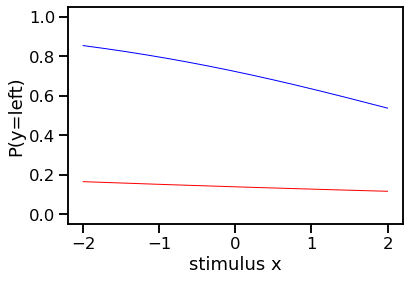

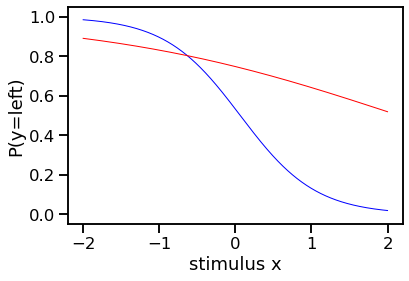

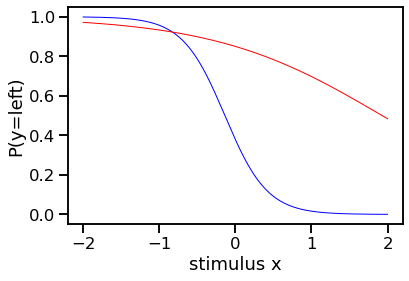

In [116]:
dGLMHMM = dglm_hmm1.dGLM_HMM1(N,K,D,C)
x = np.ones((N,D))
for earlySess in [10,50,89]:
    x[:,1] = np.linspace(-2,2,N)
    phi = dGLMHMM.observation_probability(x, np.repeat(trueW[sessInd[earlySess]][np.newaxis], N, axis=0))
    # fig, axes = plt.subplots()
    # axes.set_ylim(-0.05,1.05)
    # axes.set_ylabel('P(y=left)')
    # axes.set_xlabel('stimulus x')
    # axes.plot(np.linspace(-2,2,N), phi[:,0,1], color='blue', linewidth=1)
    # fig.savefig(f'../figures_M1/Fig1_state1_psychometric{earlySess}.pdf')
    fig, axes = plt.subplots()
    axes.set_ylim(-0.05,1.05)
    axes.set_ylabel('P(y=left)')
    axes.set_xlabel('stimulus x')
    axes.plot(np.linspace(-2,2,N), phi[:,0,1], color='blue', linewidth=1)
    axes.plot(np.linspace(-2,2,N), phi[:,1,1], color='red', linewidth=1)
    fig.savefig(f'../figures_M1/Fig1_psychometric{earlySess}.pdf')